# Support Groups MD

## Get health advice from the experiences of thousands of patients who are fighting the same battle

“Candida overgrowth” – is a health condition that effects millions, who suffer from numerous symptoms and have no defined and consolidated treatments

This led to the emergence of numerous support forums of patients advising each other on what treatment they tried, and what worked for them

The problem is that forums are highly disorganized, users get information overload, and users are left to conduct meticulous research to get even the smallest hint for a potential solution.

So what if we could detect the best treatments that worked, from thousands of user experiences?

The ultimate goal of this project is to build a data base of treatments attempted by users (by using NLP methodologies) and try to predict users wellbeing based on this data base (by using Sentiment Analysis and ML classification models). Finally I will attempt to quantify and showcase which are the most effective treatments in tackling this condition

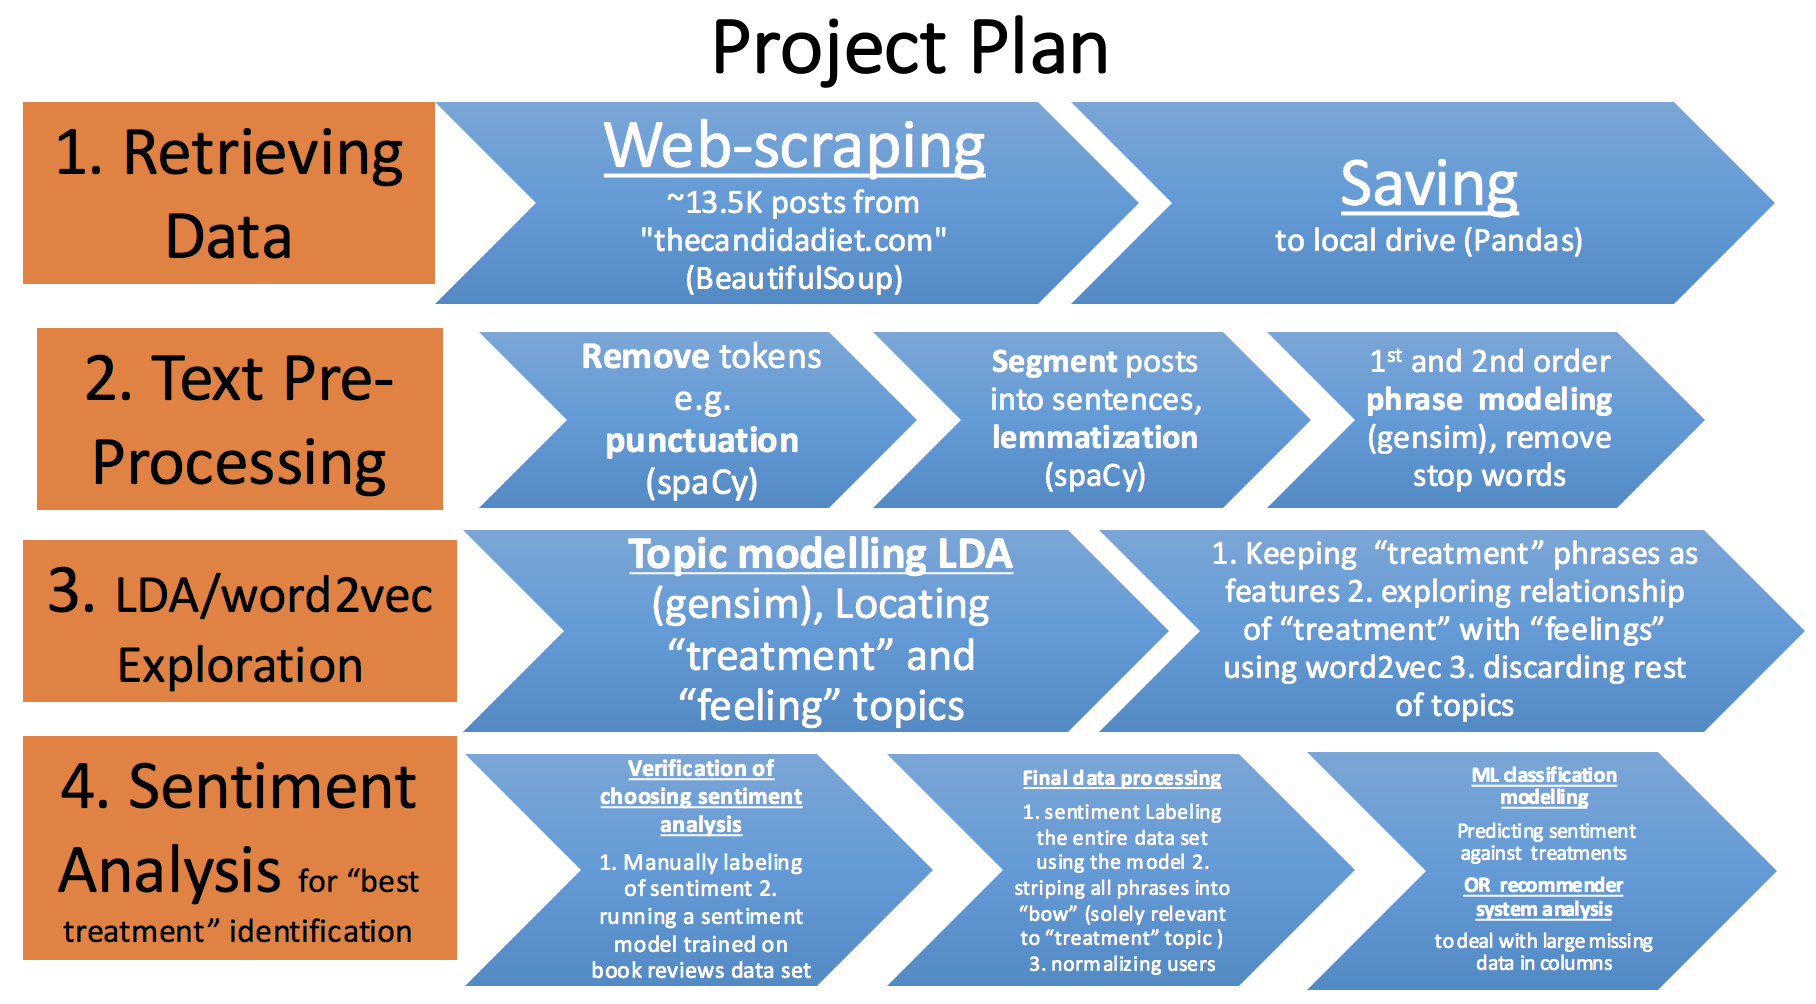

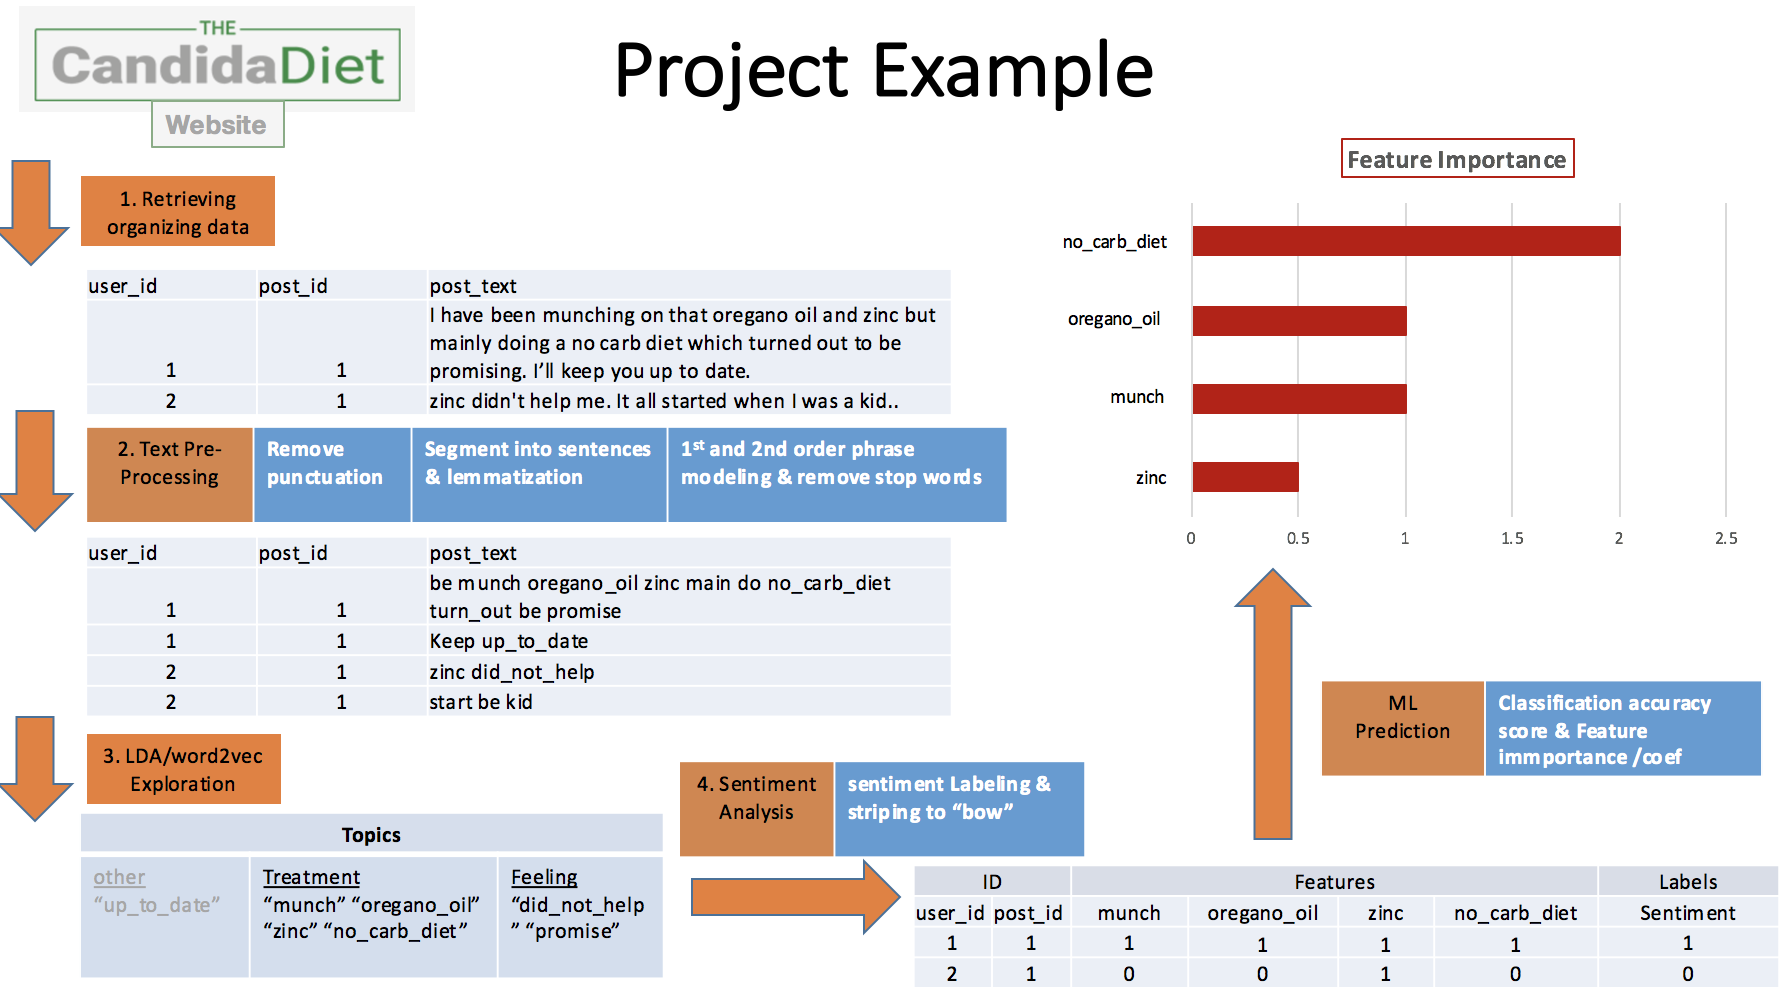

# 1. Retrieving the Data

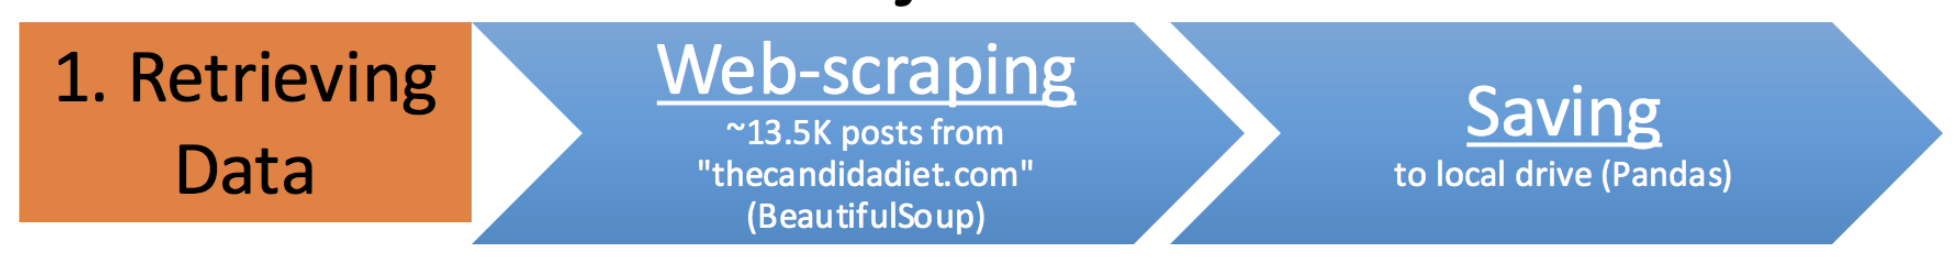

### Used candida_scraper.py to retrieve ~45,000 posts by patients asking for advice and sharing their story 

##### 1. the forum is on url='https://www.thecandidadiet.com/forums/forum/general-discussion/'
##### 2. load candida_scraper.py
##### 3. use mother(url) function to scrape the posts from url and save into df
##### 4. save df into csv to store

### Retrieved the data, saved into "scraped_raw.csv" ( look at candida_scraper.py)

##### let's import the data into this notebook

In [148]:
import pandas as pd

In [451]:
dff=pd.read_csv('/Users/eran/Jupyter notebooks/SIBO_project/pitch_day/discussion_raw.csv')
print('number of rows(posts) =',len(dff))
dff.head()

number of rows(posts) = 45272


,Unnamed: 0,user_name,topic_ID,post_text
0,0,jacquibrown,1,HiIs coconut nectar and coconut butter ok to h...
1,1,Wiley200,1,Not sure about coconut butter. Coconut nectar ...
2,2,jacquibrown,1,Thank you! I have not had any reactions to the...
3,0,Jeska,2,"Ok, so first thing I need to know because I ha..."
4,1,Himawari,2,"First, wanna say it’s nice to see a post by a ..."


In [28]:
# path to be used later for more ease:
import os
sibo_path='/Users/eran/Jupyter notebooks/SIBO_project/'
support_path='/Users/eran/Galvanize_more_repositories/Support_group_MD/'

In [468]:
# some nulls in the post_text data:
print(dff.info())
print('________________________')
print("any nulls in the data?",dff['post_text'].isnull().values.any())
print('number of nulls =',sum(dff['post_text'].isnull()))

<class 'pandas.core.frame.DataFrame'>
Index: 45272 entries, 0 to 45271
Data columns (total 5 columns):
user_name              45272 non-null object
topic_ID               45272 non-null int64
ID_of_post_in_topic    45272 non-null int64
post_ID                45272 non-null int64
post_text              45255 non-null object
dtypes: int64(3), object(2)
memory usage: 3.3+ MB
None
________________________
any nulls in the data? True
number of nulls = 17


In [482]:
# let's drop rows with nan:
dff=dff.dropna()
print("any nulls in the data?",dff['post_text'].isnull().values.any())

any nulls in the data? False


In [484]:
dff=dff.rename(index=str, columns={"Unnamed: 0": "ID_of_post_in_topic"})
dff=dff[['user_name','topic_ID','ID_of_post_in_topic','post_text']]
print("number of unique users (patients):",len(pd.unique(dff['user_name'])))


number of unique users (patients): 3408


##### organizing better the data in the dataframe

In [485]:
# let's make a more "descriptive" post id (than the index)
# we'll make a new column -"post_ID", by transforming the column - "ID_of_post_in_topic" into unique identifier
# 
dff['post_ID']=dff['topic_ID']*100+dff['ID_of_post_in_topic']
dff=dff[['user_name','topic_ID','ID_of_post_in_topic','post_ID','post_text']]# arranging the coulmns again
dff.head(10)

,user_name,topic_ID,ID_of_post_in_topic,post_ID,post_text
0,jacquibrown,1,0,100,HiIs coconut nectar and coconut butter ok to h...
1,Wiley200,1,1,101,Not sure about coconut butter. Coconut nectar ...
3,Jeska,2,0,200,"Ok, so first thing I need to know because I ha..."
4,Himawari,2,1,201,"First, wanna say it’s nice to see a post by a ..."
5,Jeska,2,2,202,"Yeah I figured out the nori trick, but it’s no..."
6,ssrapos,2,3,203,Looks like it’s been a long time since anyone ...
7,Wiley200,2,4,204,OK so you’re not understanding how fermentatio...
8,healthylife,3,0,300,HelloI have been on this diet for 6 months wit...
9,promo,3,1,301,"hey healthylife, i have staph and candida as w..."
10,candida_sucks,4,0,400,How many of you guys have experience with cand...


# 2. Text pre-processing

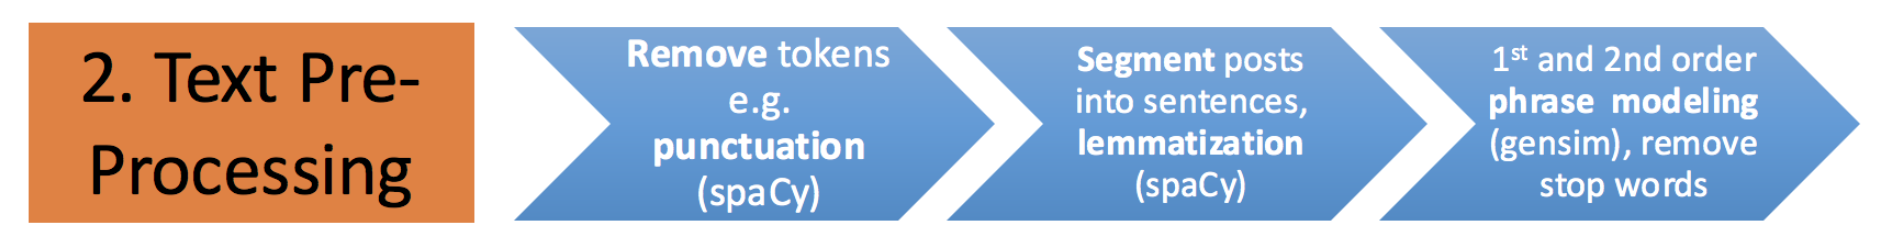

## Let's explore "spaCy" with our "candida posts" data

based on https://github.com/Erolino/modern-nlp-in-python/blob/master/executable/Modern_NLP_in_Python.ipynb

but refer to my version notebook in ../Galvanize_more_repositories/modern-nlp-in-python/executable/.. : 
http://localhost:8888/notebooks/Galvanize_more_repositories/modern-nlp-in-python/executable/Modern_NLP_in_Python_mine.ipynb#first-i-needed-to-install-spacy-using:

In [41]:
import spacy
import pandas as pd
import numpy as np
import itertools as it

nlp = spacy.load('en')

In [91]:
post8=df['post_text'][8]
print('Post8:')
print(post8)
type(post8) ## nlp in spaCy can only get string 

Post8:
HelloI have been on this diet for 6 months with no change and have been using Nystatin orally and via enema for 6 weeks now (with good affect) I still feel like something is missing though. My tongue remains white despite using very high dose nystatin. I was wondering if anyone had tried doxycycline and fluconazole? I only ask because all the stool and swab tests I’ve had done come back positive to staph infection and negative for candida I’m thinking it’s an underlying staph infection that feeds the candida. I have been treating this issue for 2 years now


str

In [97]:
parsed_post= nlp(post8)

In [98]:
parsed_post ## note that "nothing happend" cause the magic is under the hood

HelloI have been on this diet for 6 months with no change and have been using Nystatin orally and via enema for 6 weeks now (with good affect) I still feel like something is missing though. My tongue remains white despite using very high dose nystatin. I was wondering if anyone had tried doxycycline and fluconazole? I only ask because all the stool and swab tests I’ve had done come back positive to staph infection and negative for candida I’m thinking it’s an underlying staph infection that feeds the candida. I have been treating this issue for 2 years now

In [99]:
for num, sentence in enumerate(parsed_post.sents):
    print('Sent{}:'.format(num + 1))
    print(sentence)
    print('')

Sent1:
HelloI have been on this diet for 6 months with no change and have been using Nystatin orally and via enema for 6 weeks now (with good affect)

Sent2:
I still feel like something is missing though.

Sent3:
My tongue remains white despite using very high dose nystatin.

Sent4:
I was wondering if anyone had tried doxycycline and fluconazole?

Sent5:
I only ask because all the stool and swab tests I’ve had done come back positive to staph infection and negative for candida

Sent6:
I’m thinking it’s an underlying staph infection that feeds the candida.

Sent7:
I have been treating this issue for 2 years now



In [100]:
# for some reason this gives back the entities only in the 1st sentence
for num, entity in enumerate(parsed_post.ents):
    print('Entity {}:'.format(num + 1), entity, '-', entity.label_)
    print ('')

Entity 1: 6 months - DATE

Entity 2: Nystatin - PERSON

Entity 3: 6 weeks - DATE

Entity 4: 2 years - DATE



In [115]:
token_text = [token.orth_ for token in parsed_post]
token_pos = [token.pos_ for token in parsed_post]

pd.DataFrame({'token_text':token_text,'part_of_speech':token_pos}).head(7)

,part_of_speech,token_text
0,ADJ,HelloI
1,VERB,have
2,VERB,been
3,ADP,on
4,DET,this
5,NOUN,diet
6,ADP,for


In [122]:
# lematizing(steming) i.e. normalizing and 
token_lemma = [token.lemma_ for token in parsed_post]
token_shape = [token.shape_ for token in parsed_post]

pd.DataFrame(list(zip(token_text, token_lemma, token_shape)), ## using list because otherwise zip causes an error
             columns=['token_text', 'token_lemma', 'token_shape']).head(10)

,token_text,token_lemma,token_shape
0,HelloI,helloi,XxxxxX
1,have,have,xxxx
2,been,be,xxxx
3,on,on,xx
4,this,this,xxxx
5,diet,diet,xxxx
6,for,for,xxx
7,6,6,d
8,months,month,xxxx
9,with,with,xxxx


In [124]:
token_entity_type = [token.ent_type_ for token in parsed_post]
token_entity_iob = [token.ent_iob_ for token in parsed_post]

pd.DataFrame(list(zip(token_text, token_entity_type, token_entity_iob)),
             columns=['token_text', 'entity_type', 'inside_outside_begin']).head(8)

,token_text,entity_type,inside_outside_begin
0,HelloI,,O
1,have,,O
2,been,,O
3,on,,O
4,this,,O
5,diet,,O
6,for,,O
7,6,DATE,B


What about a variety of other token-level attributes, such as the relative frequency of tokens, and whether or not a token matches any of these categories?
- stopword
- punctuation
- whitespace
- represents a number
- whether or not the token is included in spaCy's default vocabulary?

In [131]:

token_attributes = [(token.orth_,
                     token.prob,
                     token.is_stop,
                     token.is_punct,
                     token.is_space,
                     token.like_num,
                     token.is_oov)
                    for token in parsed_post]

df = pd.DataFrame(token_attributes,
                  columns=['text',
                           'log_probability',
                           'stop?',
                           'punctuation?',
                           'whitespace?',
                           'number?',
                           'out of vocab.?'])

df.loc[:, 'stop?':'out of vocab.?'] = (df.loc[:, 'stop?':'out of vocab.?']
                                       .applymap(lambda x: u'Yes' if x else u''))

print("There is a problem with out of vocabulary column..")
df.head(8)

There is a problem with out of vocabulary column..


,text,log_probability,stop?,punctuation?,whitespace?,number?,out of vocab.?
0,HelloI,-20.0,,,,,Yes
1,have,-20.0,Yes,,,,Yes
2,been,-20.0,Yes,,,,Yes
3,on,-20.0,Yes,,,,Yes
4,this,-20.0,Yes,,,,Yes
5,diet,-20.0,,,,,Yes
6,for,-20.0,Yes,,,,Yes
7,6,-20.0,,,,Yes,Yes


## Let's explore "gensim" with our "candida posts" 

#### 1st, let's install gensim:

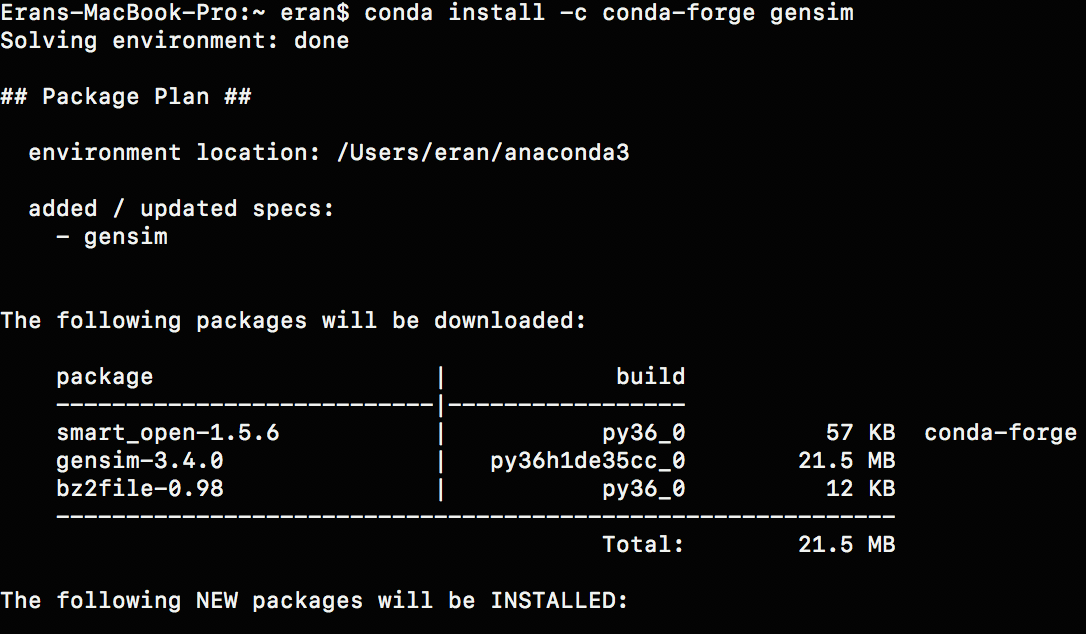

In [42]:
import boto3
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence

As we're performing phrase modeling, we'll be doing some iterative data transformation at the same time. Our roadmap for data preparation includes:

1. Segment text of complete reviews into sentences & normalize text
1. First-order phrase modeling $\rightarrow$ _apply first-order phrase model to transform sentences_
1. Second-order phrase modeling $\rightarrow$ _apply second-order phrase model to transform sentences_
1. Apply text normalization and second-order phrase model to text of complete reviews

We'll use this transformed data as the input for some higher-level modeling approaches in the following sections.

First, let's define a few helper functions that we'll use for text normalization. In particular, the `lemmatized_sentence_corpus` generator function will use spaCy to:
- Iterate over the posts column in the dataframe 
- Segment the reviews into individual sentences
- Remove punctuation and excess whitespace
- Lemmatize the text

... and do so efficiently in parallel, thanks to spaCy's `nlp.pipe()` function.

## 2.1. Segment text of posts into sentences & normalize text

##### first we need to turn the posts column in the data frame to a list of strings so it will fit the requirements of the "nlp.pipe" func

In [488]:
# For all!
A=list(dff['post_text']) ## just choosing the 1st 5 posts to explore
print("type:",type(A))
A[0:3]

type: <class 'list'>


['HiIs coconut nectar and coconut butter ok to have when treating candida? Thanks for your help',
 'Not sure about coconut butter. Coconut nectar would be a definite No, because of the high natural sugar content.',
 'Ok, so first thing I need to know because I have read different things is: -Is Kimchi ok to eat or not? Especially in the first stages.. I read it could contain yeast through fermentation so I stayed away from it, (extremely hard to do while living in Korea!!) But the site here says it’s ok…WHO IS CORRECT?? -Also I teach and I get extremely tired during the day…I am not supposed to have coffee, it has been pretty impossible…what should I do?? Is it true yeast creates energy and I am currently depleting my body of it so I am more tired?? -And, if anyone could name so safe to eat Korean food that would be rad! Thanks!']

In [494]:
# Helper functions:

def punct_space(token):
    """
    helper function to eliminate tokens
    that are pure punctuation or whitespace
    """
    
    return token.is_punct or token.is_space

def line_review(list_of_posts):
    """
    generator function to read in reviews from the file
    and un-escape the original line breaks in the text
    """
    
    for post in list_of_posts:
        yield post.replace('\\n', '\n')

def lemmatized_sentence_corpus(list_of_posts):
    """
    generator function to use spaCy to parse reviews,
    lemmatize the text, and yield sentences
    """
    
    for parsedPosts in nlp.pipe(line_review(list_of_posts)):
    
        for sent in parsedPosts.sents:
            yield u' '.join([token.lemma_ for token in sent
                             if not punct_space(token)])

In [495]:
## now I can feed "a" into the function that parses,lenmatizes and gives out sentences
lsc=lemmatized_sentence_corpus(A) 

In [496]:
## "path_to" is the name of the new text file that will get the sentences 
path_to_file=os.path.join(sibo_path,'uni_sentences_all.txt')

Let's use the lemmatized_sentence_corpus generator to loop over the original review text, segmenting the reviews into individual sentences and normalizing the text. We'll write this data back out to a new file (unigram_sentences_all), with one normalized sentence per line. We'll use this data for learning our phrase models.

In [497]:
%%time
## time to run the functions in a generator 
import codecs

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 1 == 1:

    with codecs.open(path_to_file, 'w', encoding='utf_8') as f:
        for sentence in lsc:
            f.write(sentence + '\n') 

CPU times: user 18min 41s, sys: 4min 12s, total: 22min 53s
Wall time: 15min 27s


##### That took a long time ~20 mins.. 

In [500]:
print("now you can check the file we just wrote:",path_to_file)

now you can check the file we just wrote: /Users/eran/Jupyter notebooks/SIBO_project/uni_sentences_all.txt


In [509]:
## reading back to data frame to make sure that everything is ok
sentdf=pd.read_csv('/Users/eran/Jupyter notebooks/SIBO_project/uni_sentences_all.txt',header=None,,error_bad_lines=False)
## let's print out from the df, the 0 to 10th row
for sent in it.islice(sentdf[0], 0, 10):
    print(sent)

b'Skipping line 665: expected 1 fields, saw 2\nSkipping line 728: expected 1 fields, saw 4\nSkipping line 736: expected 1 fields, saw 4\nSkipping line 979: expected 1 fields, saw 2\nSkipping line 1401: expected 1 fields, saw 2\nSkipping line 1560: expected 1 fields, saw 2\nSkipping line 2055: expected 1 fields, saw 2\nSkipping line 2164: expected 1 fields, saw 3\nSkipping line 3166: expected 1 fields, saw 2\nSkipping line 6017: expected 1 fields, saw 3\nSkipping line 7060: expected 1 fields, saw 2\nSkipping line 7234: expected 1 fields, saw 2\nSkipping line 7437: expected 1 fields, saw 2\nSkipping line 7442: expected 1 fields, saw 2\nSkipping line 7469: expected 1 fields, saw 3\nSkipping line 7491: expected 1 fields, saw 2\nSkipping line 8068: expected 1 fields, saw 2\nSkipping line 8154: expected 1 fields, saw 2\nSkipping line 8170: expected 1 fields, saw 2\nSkipping line 8876: expected 1 fields, saw 3\nSkipping line 8937: expected 1 fields, saw 4\nSkipping line 9125: expected 1 field

hii coconut nectar and coconut butter ok to have when treat candida
thank for -PRON- help
not sure about coconut butter
coconut nectar would be a definite no because of the high natural sugar content
ok so first thing -PRON- need to know because -PRON- have read different thing be -is kimchi ok to eat or not
especially in the first stage
-PRON- read -PRON- could contain yeast through fermentation
so -PRON- stay away from -PRON- extremely hard to do while live in korea
but the site here say -PRON- ’ ok
who be correct


#### there were enough rows that have been removed because they were "bad". need to investigate which ones (look at warnning) so I know to refer to them in the original dff, but there enough rows left it seems:
    

In [510]:
sentdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413914 entries, 0 to 413913
Data columns (total 1 columns):
0    413914 non-null object
dtypes: object(1)
memory usage: 3.2+ MB


In [511]:
sentdf.head(5)

,0
0,hii coconut nectar and coconut butter ok to ha...
1,thank for -PRON- help
2,not sure about coconut butter
3,coconut nectar would be a definite no because ...
4,ok so first thing -PRON- need to know because ...


If your data is organized like our `unigram_sentences_all` file now is &mdash; a large text file with one document/sentence per line &mdash; gensim's [**LineSentence**](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.LineSentence) class provides a convenient iterator for working with other gensim components. It *streams* the documents/sentences from disk, so that you never have to hold the entire corpus in RAM at once. This allows you to scale your modeling pipeline up to potentially very large corpora.

In [512]:
unigram_sentences = LineSentence(path_to_file)

In [522]:
for unigram_sentence in it.islice(unigram_sentences, 0, 32): ## this are the rows chosen
    print (u' '.join(unigram_sentence))
    print(unigram_sentence.)
    print (u'')

hii coconut nectar and coconut butter ok to have when treat candida

thank for -PRON- help

not sure about coconut butter

coconut nectar would be a definite no because of the high natural sugar content

ok so first thing -PRON- need to know because -PRON- have read different thing be -is kimchi ok to eat or not

especially in the first stage

-PRON- read -PRON- could contain yeast through fermentation

so -PRON- stay away from -PRON- extremely hard to do while live in korea

but the site here say -PRON- ’ ok

who be correct

-also

-PRON- teach

and -PRON- get extremely tired during the day

-PRON- be not suppose to have coffee -PRON- have be pretty impossible what should -PRON- do

be -PRON-

true yeast create energy and -PRON- be currently deplete -PRON- body of -PRON-

so -PRON- be more tired

-and if anyone could name so safe to eat korean food that would be rad

thank

first wanna say -PRON- ’ nice to see a post by a fellow candida diet contender live in asia

-PRON- be probably 

## 2.2. Bigrams - first-order phrase modeling  →→  apply first-order phrase model to transform sentences 

##### Next, we'll learn a phrase model that will link individual words into two-word phrases. We'd expect words that together represent a specific concept, like "ice cream", to be linked together to form a new, single token: "ice_cream".

In [515]:
bigram_model_filepath = os.path.join(sibo_path, 'bigram_model_all')

#### phrases is from the gensim package that learns bigrams as follows:

_Phrase modeling_ is another approach to learning combinations of tokens that together represent meaningful multi-word concepts. We can develop phrase models by looping over the the words in our reviews and looking for words that _co-occur_ (i.e., appear one after another) together much more frequently than you would expect them to by random chance. The formula our phrase models will use to determine whether two tokens $A$ and $B$ constitute a phrase is:

$$\frac{count(A\ B) - count_{min}}{count(A) * count(B)} * N > threshold$$

...where:
* $count(A)$ is the number of times token $A$ appears in the corpus
* $count(B)$ is the number of times token $B$ appears in the corpus
* $count(A\ B)$ is the number of times the tokens $A\ B$ appear in the corpus *in order*
* $N$ is the total size of the corpus vocabulary
* $count_{min}$ is a user-defined parameter to ensure that accepted phrases occur a minimum number of times
* $threshold$ is a user-defined parameter to control how strong of a relationship between two tokens the model requires before accepting them as a phrase

Once our phrase model has been trained on our corpus, we can apply it to new text. When our model encounters two tokens in new text that identifies as a phrase, it will merge the two into a single new token.

Phrase modeling is superficially similar to named entity detection in that you would expect named entities to become phrases in the model (so _new york_ would become *new\_york*). But you would also expect multi-word expressions that represent common concepts, but aren't specifically named entities (such as _happy hour_) to also become phrases in the model.

We turn to the indispensible [**gensim**](https://radimrehurek.com/gensim/index.html) library to help us with phrase modeling &mdash; the [**Phrases**](https://radimrehurek.com/gensim/models/phrases.html) class in particular.

##### so let's learn bigrams in the text "unigram sentences" and write the bigram model into a txt file with that name. (later we'll apply it to the text, but not yet.)

In [516]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute modeling yourself.
if 1 == 1:

    bigram_model = Phrases(unigram_sentences)

    bigram_model.save(bigram_model_filepath)
    
# load the finished model from disk
bigram_model = Phrases.load(bigram_model_filepath)

CPU times: user 10.3 s, sys: 199 ms, total: 10.5 s
Wall time: 10.5 s


Now that we have a trained phrase model for word pairs, let's apply it to the review sentences data and explore the results.

In [517]:
bigram_sentences_filepath = os.path.join(sibo_path,
                                         'bigram_sentences_all.txt')

In [518]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 1 == 1:

    with codecs.open(bigram_sentences_filepath, 'w', encoding='utf_8') as f:
        
        for unigram_sentence in unigram_sentences:
            
            bigram_sentence = u' '.join(bigram_model[unigram_sentence])
            
            f.write(bigram_sentence + '\n')

/Users/eran/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


CPU times: user 25 s, sys: 84.5 ms, total: 25.1 s
Wall time: 25.2 s


In [519]:
bigram_sentences = LineSentence(bigram_sentences_filepath)

In [523]:
for bigram_sentence in it.islice(bigram_sentences, 0, 32):
    print(u' '.join(bigram_sentence))
    print(u'')

hii coconut_nectar and coconut butter ok to have when treat candida

thank for -PRON- help

not sure about coconut butter

coconut_nectar would be a definite no because of the high natural sugar_content

ok so first thing -PRON- need to know because -PRON- have read different thing be -is kimchi ok to eat or not

especially in the first stage

-PRON- read -PRON- could contain yeast through fermentation

so -PRON- stay_away from -PRON- extremely hard to do while live in korea

but the site here say -PRON- ’ ok

who be correct

-also

-PRON- teach

and -PRON- get extremely tired during the day

-PRON- be not suppose to have coffee -PRON- have be pretty impossible what should -PRON- do

be -PRON-

true yeast create energy and -PRON- be currently deplete -PRON- body of -PRON-

so -PRON- be more tired

-and if anyone could name so safe to eat korean food that would be rad

thank

first wanna say -PRON- ’ nice to see a post by a fellow candida diet contender live in asia

-PRON- be probably 

#### Seems like the bigram output worked well e.g.:
sugar_content  / soy_sauce  /  kim_chi  /  amino_acid  /  grape_juice  / chili_pepper  / same_boat
#### bigrams it did not get in this e.g.:
apple vinegar  /  coconut butter
#### hopfuly when we do trigram:
"chili_pepper powder" will turn into "chili_pepper_powder"

## 2.3. trigrams - second-order phrase modeling  →→  apply second-order phrase model to transform sentences

In [527]:
trigram_model_filepath = os.path.join(sibo_path,
                                      'trigram_model_all.txt')

In [528]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute modeling yourself.
if 1 == 1:

    trigram_model = Phrases(bigram_sentences)

    trigram_model.save(trigram_model_filepath)
    
# load the finished model from disk
trigram_model = Phrases.load(trigram_model_filepath)

CPU times: user 10.3 s, sys: 191 ms, total: 10.5 s
Wall time: 10.5 s


We'll apply our trained second-order phrase model to our first-order transformed sentences, write the results out to a new file, and explore a few of the second-order transformed sentences.

In [532]:
trigram_sentences_filepath = os.path.join(sibo_path,
                                          'trigram_sentences_all.txt')

In [533]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 1 == 1:

    with codecs.open(trigram_sentences_filepath, 'w', encoding='utf_8') as f:
        
        for bigram_sentence in bigram_sentences:
            
            trigram_sentence = u' '.join(trigram_model[bigram_sentence])
            
            f.write(trigram_sentence + '\n')

/Users/eran/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


CPU times: user 23.9 s, sys: 53.7 ms, total: 24 s
Wall time: 24 s


In [534]:
trigram_sentences = LineSentence(trigram_sentences_filepath)

In [535]:
for trigram_sentence in it.islice(trigram_sentences, 0, 32):
    print(u' '.join(trigram_sentence))
    print(u'')

hii coconut_nectar and coconut_butter ok to have when treat candida

thank for -PRON- help

not sure about coconut_butter

coconut_nectar would be a definite no because of the high natural sugar_content

ok so first thing -PRON- need to know because -PRON- have read different thing be -is kimchi ok to eat or not

especially in the first stage

-PRON- read -PRON- could contain yeast through fermentation

so -PRON- stay_away_from -PRON- extremely hard to do while live in korea

but the site here say -PRON- ’ ok

who be correct

-also

-PRON- teach

and -PRON- get extremely_tired during the day

-PRON- be not suppose to have coffee -PRON- have be pretty impossible what should -PRON- do

be -PRON-

true yeast create energy and -PRON- be currently deplete -PRON- body of -PRON-

so -PRON- be more tired

-and if anyone could name so safe to eat korean food that would be rad

thank

first wanna say -PRON- ’ nice to see a post by a fellow candida diet contender live in asia

-PRON- be probably 

In [538]:
for trigram_sentence in it.islice(trigram_sentences, 40, 60):
    print(u' '.join(trigram_sentence))
    print(u'')

and yeah -PRON- be waaay more difficult while live in asia then -PRON- expect

and yeah -PRON- be largely speak of store_buy kimchi but be that -PRON- be in korea -PRON- run into home_make stuff all over the place and -PRON- korean be not enough to really ask what go in -PRON-

yes please help -PRON- candida expert

look like -PRON- ’ be a long time since anyone be here

but that ’ ok

-PRON- will post anyway

-PRON- be very new to the world of fermented_food

like so new that -PRON- have never try kimchi

year_ago -PRON- let natto spoil because -PRON- do not know what to do with -PRON- and there ’ literally one brand of horseradish that -PRON- like

and -PRON- only ever have -PRON- at passover

and -PRON- be not even entirely certain that -PRON- ’ ferment

however -PRON- boyfriend have become convinced that -PRON- have a yeast_infection so -PRON- be look_at thing -PRON- can make for -PRON-

-PRON- want to kill -PRON- the vegan way mean no probiotic in the form of yogurt or keifer or a

#### did not get "chili_pepper powder" but got:
a trigram: "stay_away_from"

other bigrams: green_onion / sesame_seed / sushi_roll /extremely_tired / coconut_butter

## 2.4. Apply text normalization and second-order phrase model to text of complete reviews

The final step of our text preparation process circles back to the complete text of the reviews. We're going to run the complete text of the reviews through a pipeline that applies our text normalization and phrase models.

In addition, we'll remove stopwords at this point. Stopwords are very common words, like a, the, and, and so on, that serve functional roles in natural language, but typically don't contribute to the overall meaning of text. Filtering stopwords is a common procedure that allows higher-level NLP modeling techniques to focus on the words that carry more semantic weight.

Finally, we'll write the transformed text out to a new file, with one review per line.

In [4]:
trigram_posts_filepath = os.path.join(support_path,
                                        'trigram_transformed_posts_all.txt')

In [32]:
## had some problem with text keeping ' and -PRON- so I added them to stop words
spacy.lang.en.STOP_WORDS.add("-PRON-")
spacy.lang.en.STOP_WORDS.add("'")

In [594]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 1 == 1:

    with codecs.open(trigram_posts_filepath, 'w', encoding='utf_8') as f:
        
        for parsed_p in nlp.pipe(line_review(A)):
            
            # lemmatize the text, removing punctuation and whitespace
            unigram_p = [token.lemma_ for token in parsed_p
                              if not punct_space(token)]
            
            # apply the first-order and second-order phrase models
            bigram_p = bigram_model[unigram_p]
            trigram_p = trigram_model[bigram_p]
            
            
            # remove any remaining stopwords
            trigram_p = [term for term in trigram_p
                              if term not in spacy.lang.en.STOP_WORDS]
            
            # write the transformed review as a line in the new file
            trigram_p = u' '.join(trigram_p)
            f.write(trigram_p + '\n')

/Users/eran/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


CPU times: user 19min 29s, sys: 4min 11s, total: 23min 40s
Wall time: 16min 13s


In [625]:
with codecs.open(trigram_posts_filepath, encoding='utf_8') as f:
    for post in it.islice(f, 0, 4):
        print(post)

hii coconut_nectar coconut_butter ok treat candida thank help

sure coconut_butter coconut_nectar definite high natural sugar_content

ok thing need know read different thing -is kimchi ok eat especially stage read contain yeast fermentation stay_away_from extremely hard live korea site ’ ok correct -also teach extremely_tired day suppose coffee pretty impossible true yeast create energy currently deplete body tired -and safe eat korean food rad thank

wanna ’ nice post fellow candida diet contender live asia probably same_boat lot thing whadya mean eat rice soy_sauce little trick find work wonder plain nori flat seaweed use sushi_roll fabulous snack munchie sure sure stick ingredient like soy_sauce sweetener topic hand trouble kim_chi thing ’ cover http://www.thecandidadiet.com/forum/yaf_postst809_can-i-eat-kimchi-while-doing-the-diet.aspx http://www.thecandidadiet.com/forum/yaf_postst1469_breasteeding.aspx http://www.thecandidadiet.com/forum/yaf_postst1136_allowed-foods-list.aspx not

In [570]:
len(dff)

45254

In [ ]:
## 'trigram_transformed_posts_all.txt' length is 45215.
## this means that we lost 39 rows which will make it harder to allign  

In [597]:
## let's save the original posts (1 per line) in a atext file so we can compare it to the the normalized trigram text
with codecs.open(os.path.join(sibo_path,'A.txt'), 'w', encoding='utf_8') as f:
    for post in A:
        f.write(post + '\n')

In [598]:
with codecs.open(os.path.join(sibo_path,'A.txt'), encoding='utf_8') as f:
    for post in it.islice(f, 5, 6):
        print(post)
with codecs.open(trigram_posts_filepath, encoding='utf_8') as f:
    for post in it.islice(f, 5,6 ):
        print(post)

Looks like it’s been a long time since anyone was here… But that’s ok. I’ll post anyway.I am very new to the world of fermented foods. Like, so new that I have never tried kimchi, years ago I let natto spoil ’cause I didn’t know what to do with it, and there’s literally one brand of horseradish that I like and I only ever have it at Passover and I’m not even entirely certain that it’s fermented.However, my boyfriend has become convinced that he has a yeast infection, so I’m looking at things I can make for him. He wants to kill it the vegan way, meaning no probiotics in the form of yogurt or keifer or anything like that. So kimchi is what I’m looking at. You can totally do vegan kimchi, apparently. Really, kimchi is fermented cabbage plus whatever you put in with it for flavour and seasoning. That’s why there are so many different recipes.When it comes to the candida in the body using the kimchi as a food source, it really would have everything to do with what’s in the kimchi. If the k

# 3. Topic Modeling with Latent Dirichlet Allocation (LDA)¶

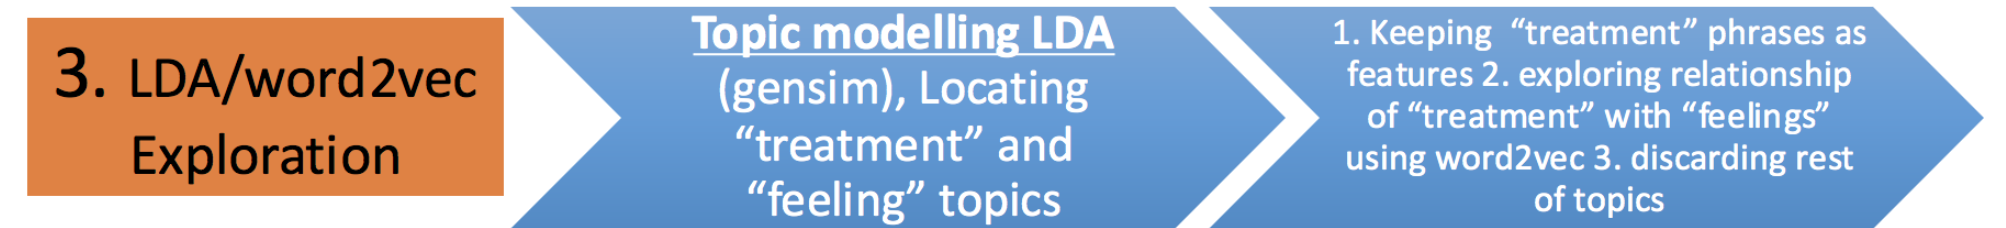

Topic modeling is family of techniques that can be used to describe and summarize the documents in a corpus according to a set of latent "topics". For this demo, we'll be using Latent Dirichlet Allocation or LDA, a popular approach to topic modeling.

In many conventional NLP applications, documents are represented a mixture of the individual tokens (words and phrases) they contain. In other words, a document is represented as a vector of token counts. There are two layers in this model — documents and tokens — and the size or dimensionality of the document vectors is the number of tokens in the corpus vocabulary. This approach has a number of disadvantages:

Document vectors tend to be large (one dimension for each token  ⇒⇒  lots of dimensions)
They also tend to be very sparse. Any given document only contains a small fraction of all tokens in the vocabulary, so most values in the document's token vector are 0.
The dimensions are fully indepedent from each other — there's no sense of connection between related tokens, such as knife and fork.
LDA injects a third layer into this conceptual model. Documents are represented as a mixture of a pre-defined number of topics, and the topics are represented as a mixture of the individual tokens in the vocabulary. The number of topics is a model hyperparameter selected by the practitioner. LDA makes a prior assumption that the (document, topic) and (topic, token) mixtures follow Dirichlet probability distributions. This assumption encourages documents to consist mostly of a handful of topics, and topics to consist mostly of a modest set of the tokens.

![LDA](https://s3.amazonaws.com/skipgram-images/LDA.png)

LDA is fully unsupervised. The topics are "discovered" automatically from the data by trying to maximize the likelihood of observing the documents in your corpus, given the modeling assumptions. They are expected to capture some latent structure and organization within the documents, and often have a meaningful human interpretation for people familiar with the subject material.

We'll again turn to gensim to assist with data preparation and modeling. In particular, gensim offers a high-performance parallelized implementation of LDA with its LdaMulticore class.

## The LDA processing and visual exploration is continued on:
    'Support_group_MD/draft/posts_LDA.py'
    'Support_group_MD/draft/Candida_NLP_pyLDAvis_visualizing.ipynb'

Like many NLP techniques, LDA uses a simplifying assumption known as the bag-of-words model. In the bag-of-words model, a document is represented by the counts of distinct terms that occur within it. Additional information, such as word order, is discarded.

Using the gensim Dictionary we learned to generate a bag-of-words representation for each review. The trigram_bow_generator function implements this. We'll save the resulting bag-of-words reviews as a matrix.

In the following code, "bag-of-words" is abbreviated as bow.